In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [50]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking for missing values

In [31]:
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
 titanic['Age'].mean().round()

np.float64(30.0)

In [21]:
titanic['Age'] = titanic['Age'].fillna(30.0)

In [29]:
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [30]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [23]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Encoding the categorical columns

In [28]:
df = titanic.copy()

In [34]:
le = LabelEncoder()
categorical_cols = ['Sex', 'Embarked']
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [ ]:
x = titanic['Survived', 'Pclass', 'Age', 'Parch', 'Fare']
y = titanic['Embarked']

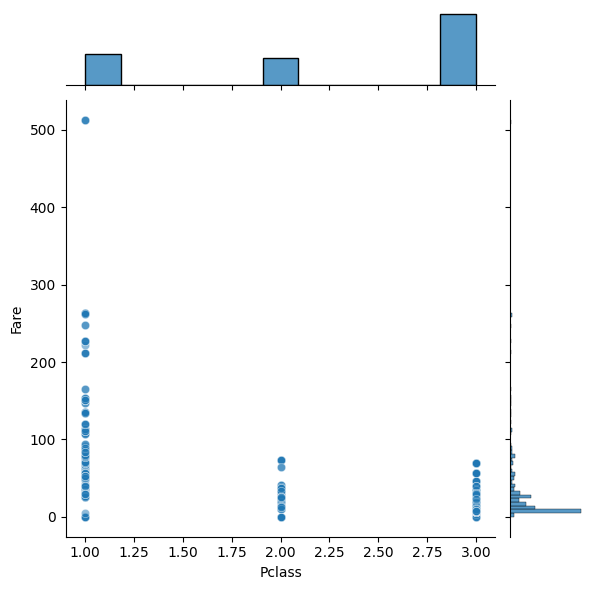

In [26]:
sns.jointplot(x = 'Pclass', y = 'Fare', data = titanic, alpha = 0.5 )

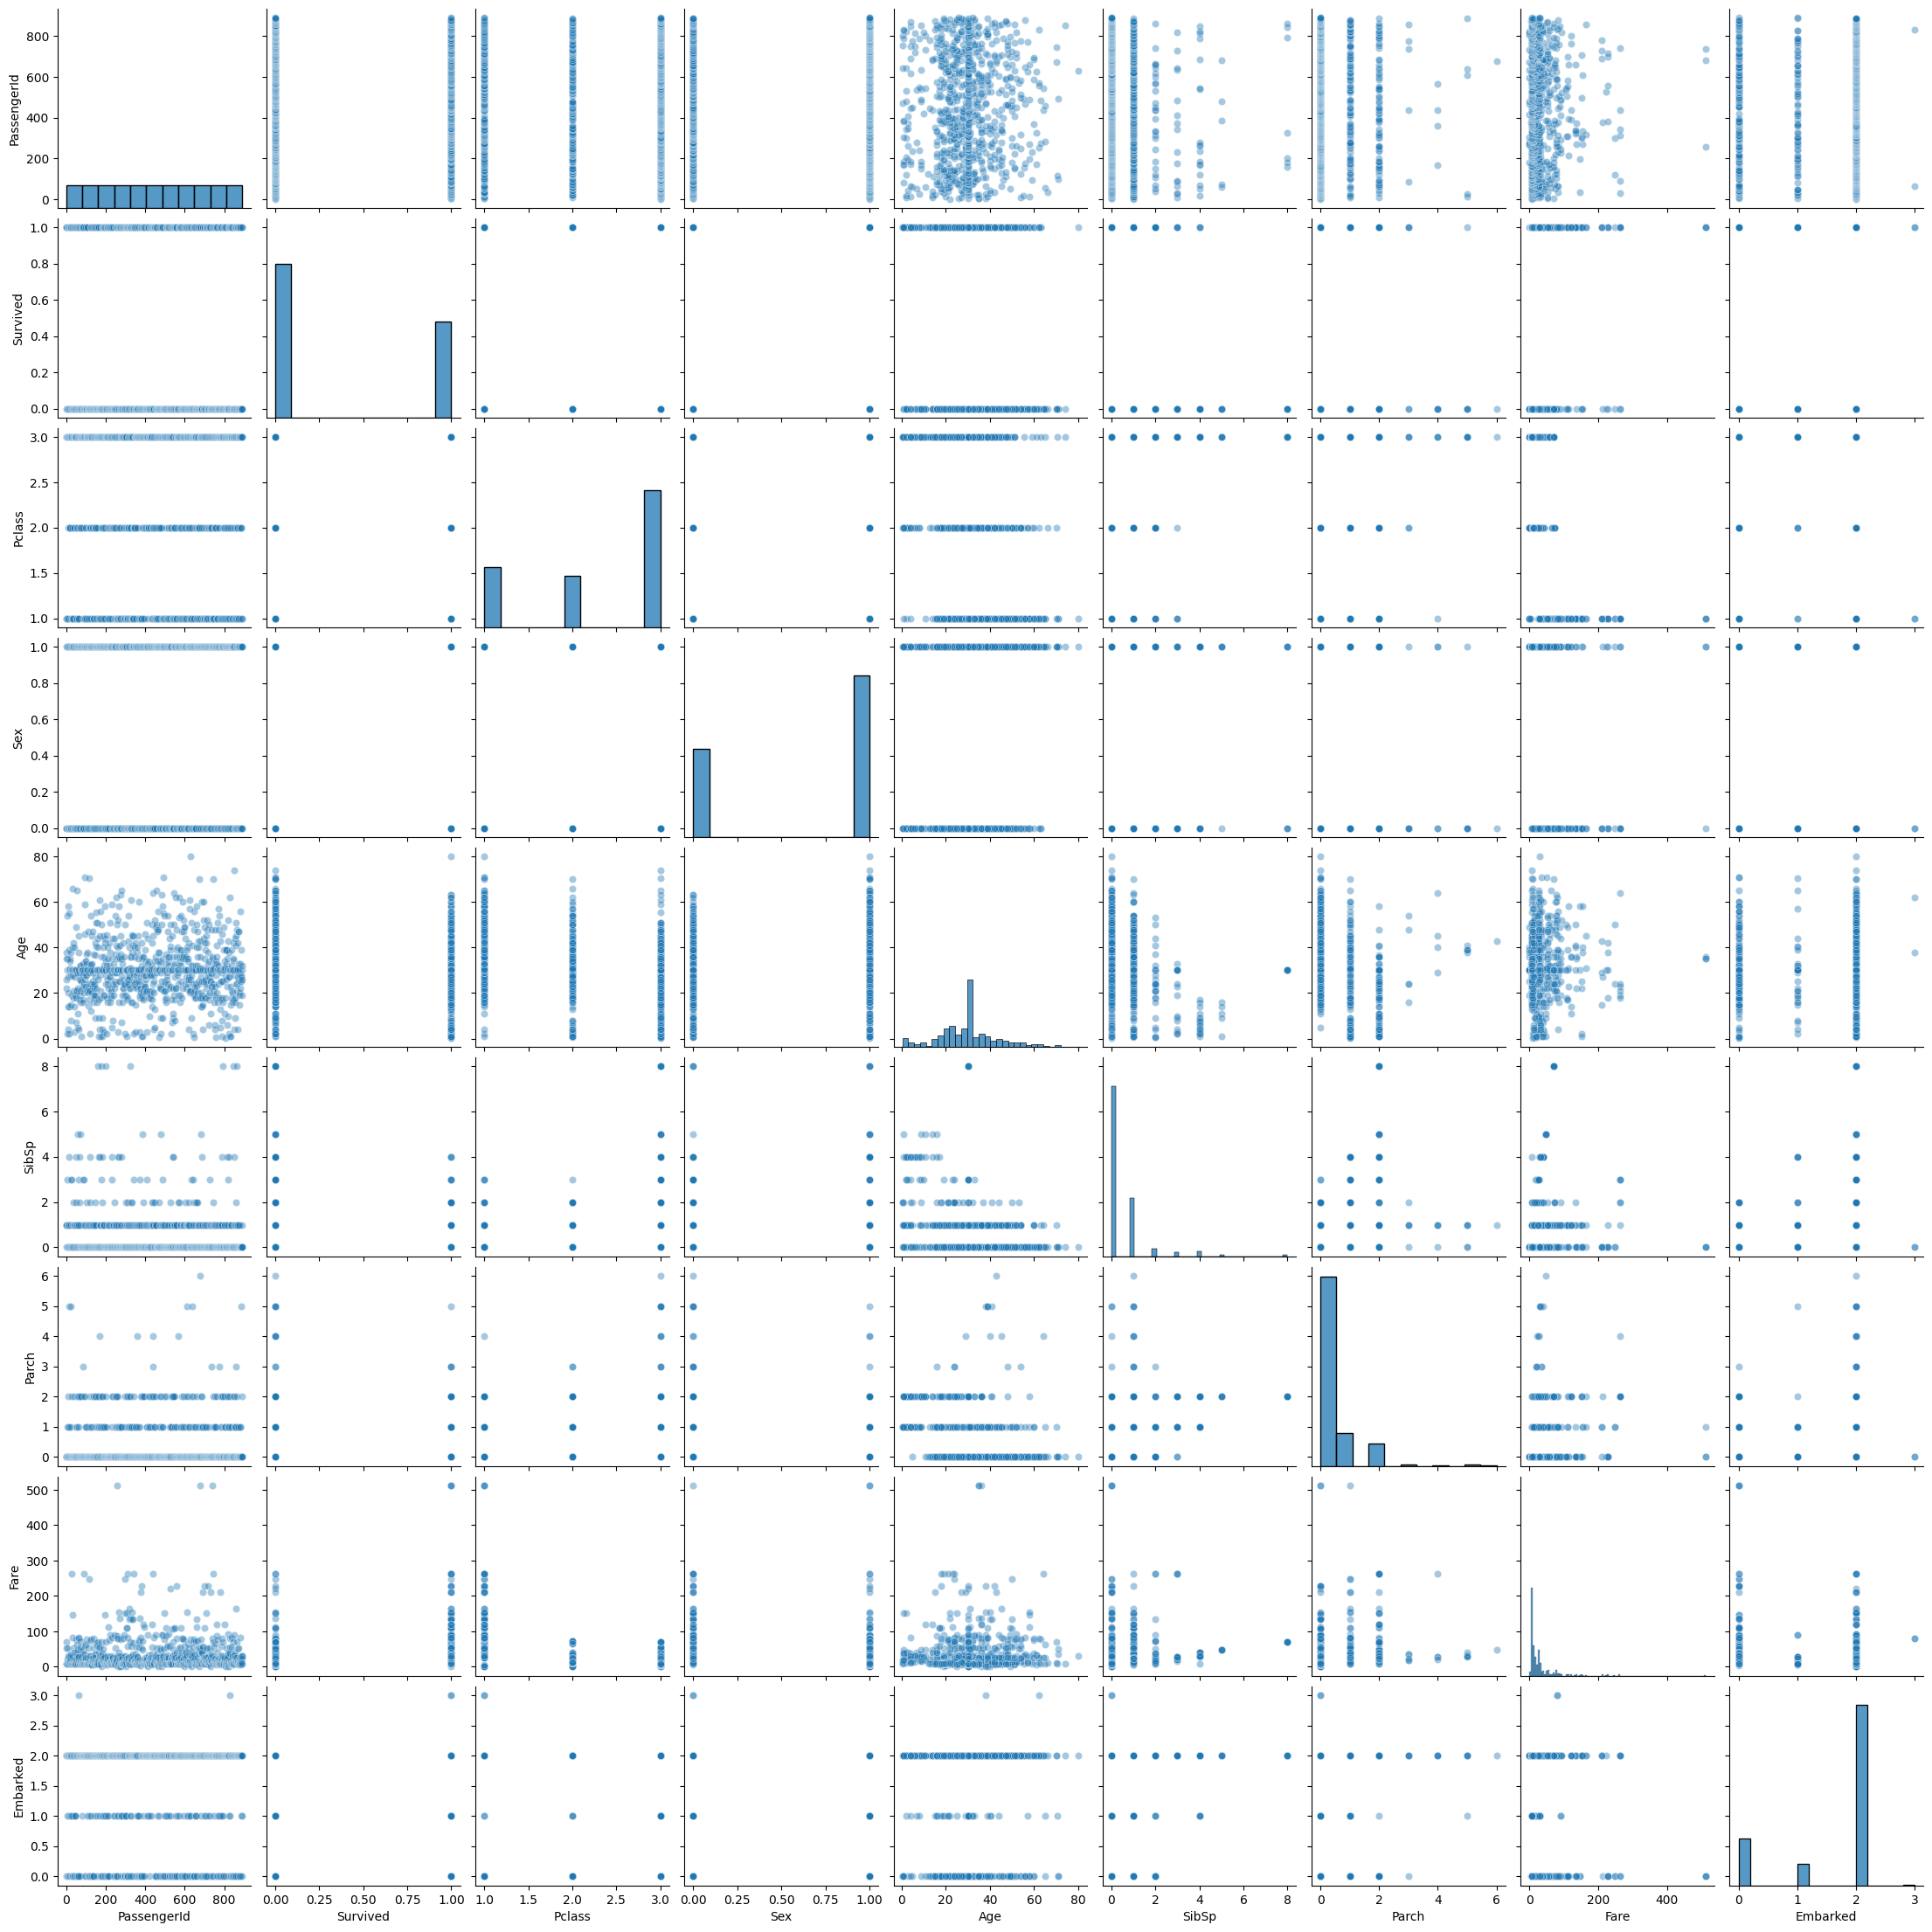

In [46]:
sns.pairplot(df,kind = 'scatter', plot_kws = {'alpha':0.4})

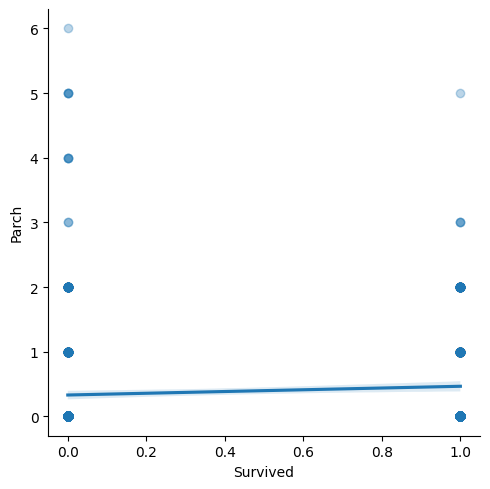

In [45]:
sns.lmplot(x = 'Survived', 
           y = 'Parch',
           data = df,
           scatter_kws = {'alpha':0.3})

In [51]:
df1 = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

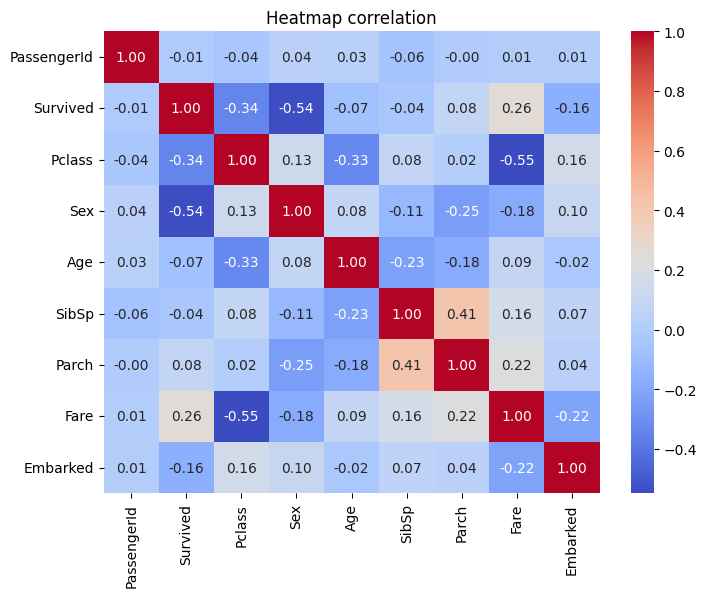

In [52]:
# correlation heatmap 

plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap correlation')
plt.show()

In [65]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [69]:
df1 = df1.drop(['PassengerId'], axis = 1)

In [70]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [71]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.368672,0.523008,0.381594,0.062858,1.538721
std,0.486592,0.836071,0.477990,0.163390,1.102743,0.806057,0.096995,0.794231
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015440,1.000000
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213,2.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,2.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,3.000000


### Logistic regression 
### creating model

In [72]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=42,
    stratify=df1.Survived)

In [74]:
from sklearn.linear_model import LogisticRegression
lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)

LogisticRegression()

In [73]:
from sklearn.metrics import accuracy_score
y_predict = lrmod.predict(X_test)
accuracy_score(y_test, y_predict)

0.7988826815642458

<Axes: >

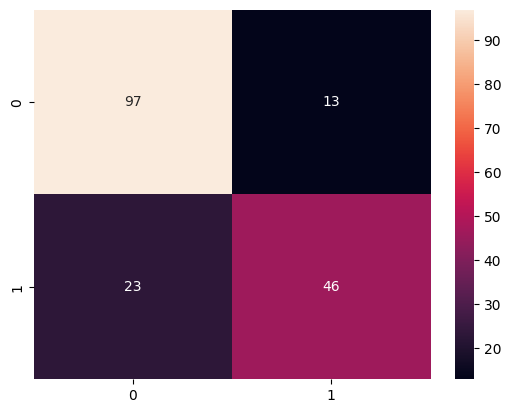

In [76]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cma=confusion_matrix(y_test, y_predict)
sns.heatmap(cma,annot=True)

####  The values in the matrix represent:
        True Negatives (TN) = 97 (top-left)
        False Positives (FP) = 13 (top-right)
        False Negatives (FN) = 23 (bottom-left)
        True Positives (TP) = 46 (bottom-right)

#### The model correctly predicted 97 negative cases (class 0) and 46 positive cases (class 1).
#### It misclassified 13 negative cases as positive (false positives).
#### It misclassified 23 positive cases as negative (false negatives).
     
#### Accuracy = (TN + TP) / Total = (97 + 46) / 179 ≈ 0.80 or 80%
#### Precision = TP / (TP + FP) = 46 / (46 + 13) ≈ 0.78 or 78%
#### Recall = TP / (TP + FN) = 46 / (46 + 23) ≈ 0.67 or 67%

#### This confusion matrix suggests that the model performs reasonably well overall, with good accuracy. However, there's room for improvement, particularly in reducing false negatives. The model seems to be better at identifying negative cases (class 0) than positive cases (class 1).

# Logistic Regression

In [6]:
#loading the datasets
#train data and test data
train = pd.read_csv('Mlearninng/train.csv')
test = pd.read_csv('Mlearninng/test.csv')

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
train.shape

(891, 12)

## Data Visualization

<Axes: xlabel='Sex'>

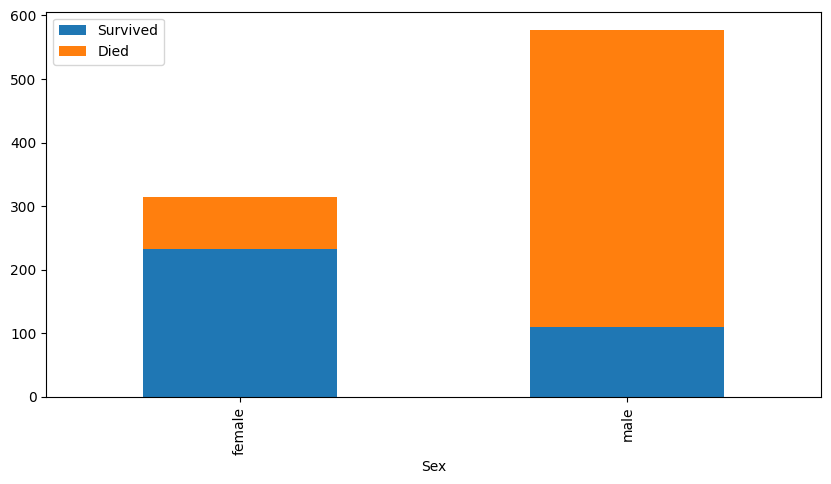

In [10]:
# Visualizing survival based on gender
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind = 'bar',figsize = (10,5), stacked = True)

In [60]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


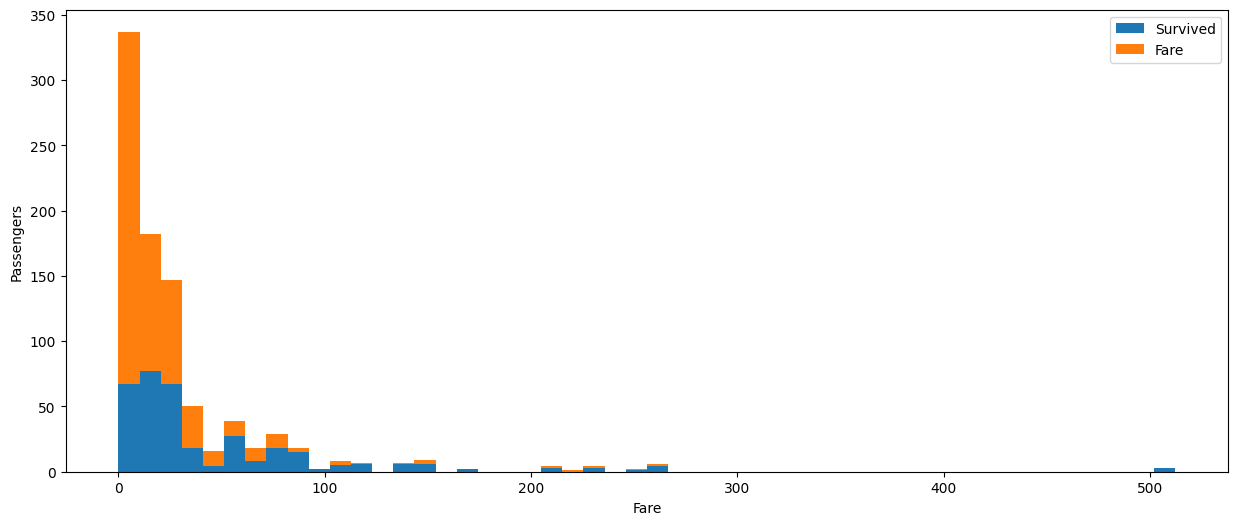

In [61]:
# Visualizing survivors based on fare
figure = plt.figure(figsize=(15,6))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']],
        stacked = True, bins = 50, label = ['Survived', 'Fare'])
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.legend()

In [12]:
# cleaning data by droping irrelevant columns
train1 = train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Died'], axis = 1)
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
#checking for missing values
train1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [32]:
#handling missing values
print ("\n Agemean:", train1['Age'].mean().round())
print ("Agemode:",train1['Age'].mode())


 Agemean: 30.0
Agemode: 0    24.0
Name: Age, dtype: float64


In [35]:
#filling missing values
train1['Age'] = train1['Age'].fillna(30)

In [38]:
train1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [1]:
# importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
# feature selection and extraction
x = train1[['Fare', 'Age', 'Pclass', 'SibSp', 'Parch']]
y = train1['Survived']

In [39]:
#splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

In [40]:
#training the model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [42]:
#predicting the model
y_pred = logreg.predict(x_test)
print ("Accuracy = {:.2f}".format(logreg.score(x_test, y_test)))

Accuracy = 0.73


<Axes: xlabel='Pclass', ylabel='Survived'>

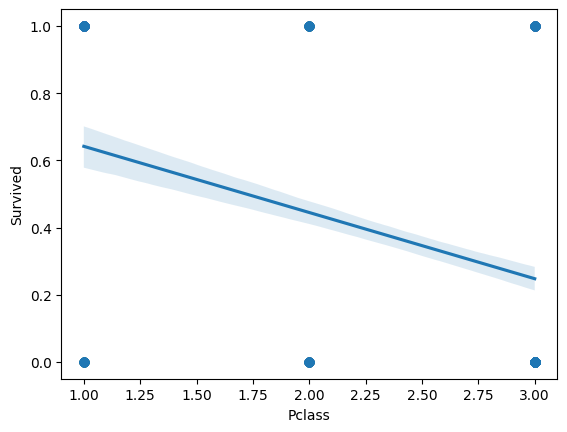

In [48]:
#scatter plot of survived Vs passenger class
sns.regplot(x = 'Pclass', y = 'Survived', data = train1)

# Key Observations
1. Negative correlation - the downward slope of the regression line indicates that as the passenger class number increases (i.e., as we move from first class to third class), the probability of survival decreases.
2. First class (Pclass = 1) passengers had the highest survival rate, while third class (Pclass = 3) passengers had the lowest.
3. The spread of points at 0 and 1 for each class shows that while there's a trend, the passenger class doesn't perfectly predict survival. There were survivors and non-survivors in all classes.
4. The confidence interval widens slightly at the extremes, indicating less certainty in the prediction for the highest and lowest classes.
   
* This visualization effectively demonstrates that passenger class was a significant factor in survival rates on the Titanic, with higher-class passengers generally having a better chance of survival.

## Decision Tree model

In [53]:
#preprocessing data
def preprocess_data(new_data):
    new_data.fillna({'Age':30}, inplace = True)

    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)

    new_data['Cabin']=new_data.Cabin.fillna('G6')

    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)

    return new_data
titanic1 = preprocess_data(titanic)

In [54]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G6,S


In [80]:
#importing relevant libraries
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [56]:
# feature extraction
x = titanic1.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis = 1)
y = titanic1['Survived']

In [58]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [75]:
#training the model
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
#evaluating the model
y_pred = tree.predict(x_test)
print ("Score:{}".format(accuracy_score(y_test, y_pred)))

Score:0.7430167597765364


In [81]:
#visualizing the model
plt.figure(figsize=(20,10))  # Set the size of the plot
tree.plot_tree(tree, feature_names=x.columns, class_names = ['Did not survive', 'Survived'], filled = True, rounded = True, fontsize = 10)
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

<Figure size 2000x1000 with 0 Axes>